UMAP is a fairly flexible non-linear dimension reduction algorithm. It seeks to learn the manifold structure of your data and find a low dimensional embedding that preserves the essential topological structure of that manifold. In this notebook we will generate some visualisable 4-dimensional data, demonstrate how to use UMAP to provide a 2-dimensional representation of it, and then look at how various UMAP parameters can impact the resulting embedding. This notebook is based on the work of Philippe Rivière for visionscarto.net.

source: https://github.com/lmcinnes/umap/blob/master/notebooks/UMAP%20usage%20and%20parameters.ipynb

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import umap
%matplotlib inline
sns.set(style='white', rc={'figure.figsize':(12,8)})

In [2]:
np.random.seed(42)
data = np.random.rand(800, 4)

In [3]:
fit = umap.UMAP()
%time u = fit.fit_transform(data)

CPU times: user 10.5 s, sys: 344 ms, total: 10.9 s
Wall time: 8.75 s


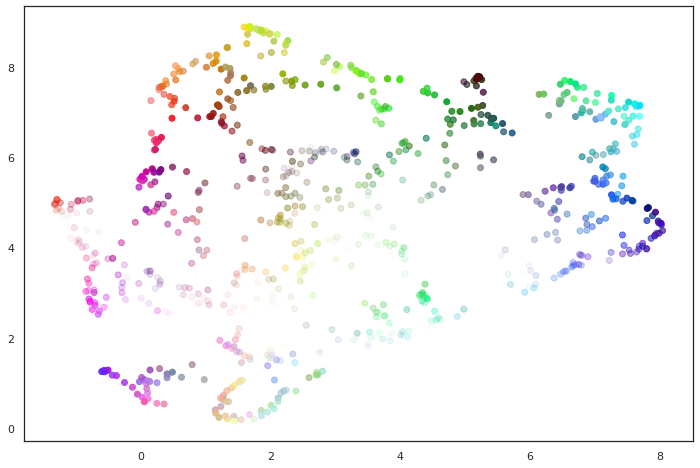

In [4]:
plt.scatter(u[:,0], u[:,1], c=data)

## Parameter Selection

UMAP has several hyperparameters that can have a significant impact on the resulting embedding. In this notebook we will be covering the four major ones:

* n_neighbors
* min_dist
* n_components
* metric

Each of these parameters has a distinct effect, and we will look at each in turn. To make exploration simpler we will first write a short utility function that can fit the data with UMAP given a set of parameter choices, and plot the result.

In [5]:
def draw_umap(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(data);
    fig = plt.figure()
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], range(len(u)), c=data)
    if n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], u[:,1], c=data)
    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(u[:,0], u[:,1], u[:,2], c=data)
    plt.title(title, fontsize=18)

### n_neighbors

This parameter controls how UMAP balances local versus global structure in the data. It does this by constraining the size of the local neighborhood UMAP will look at when attempting to learn the manifold structure of the data. This means that low values of n_neighbors will force UMAP to concentrate on very local structure (potentially to the detriment of the big picture), while large values will push UMAP to look at larger neighborhoods of each point when estimating the manifold structure of the data, loosing fine detail structure for the sake of getting the broader of the data.

We can see that in practice by fitting our dataset with UMAP using a range of n_neighbors values. The default value of n_neighbors for UMAP (as used above) is 15, but we will look at values ranging from 2 (a very local view of the manifold) up to 200 (a quarter of the data).

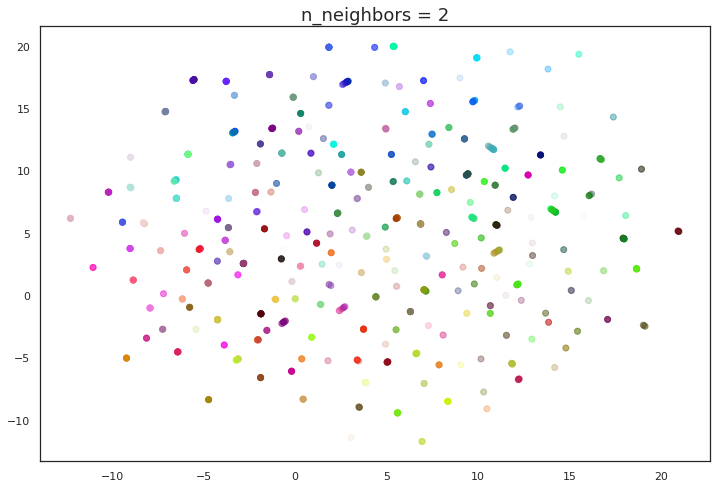

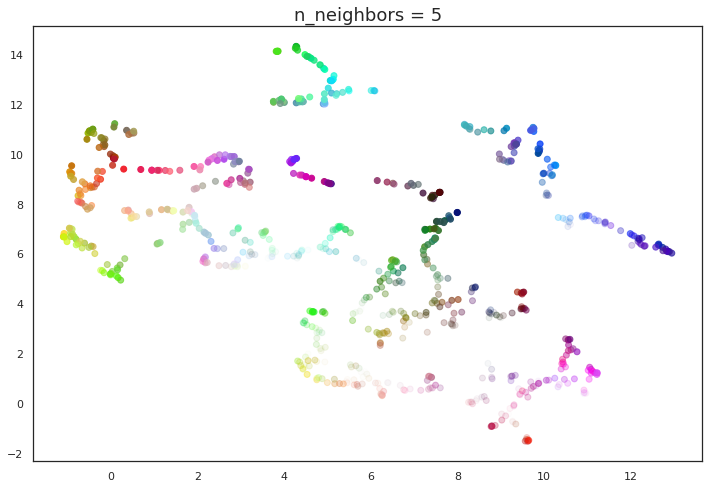

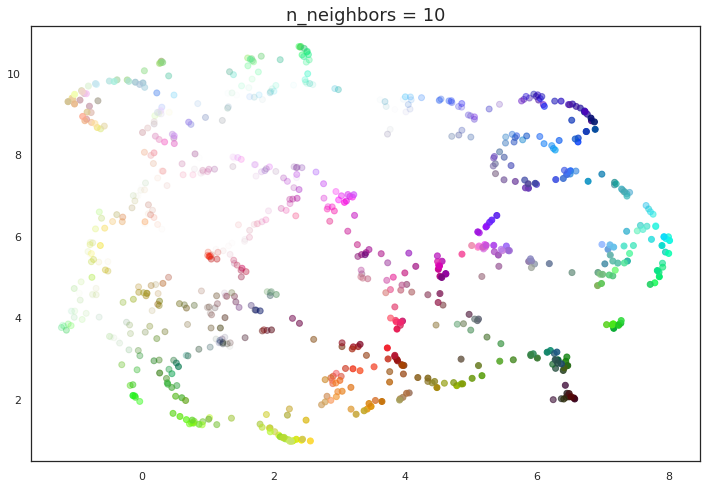

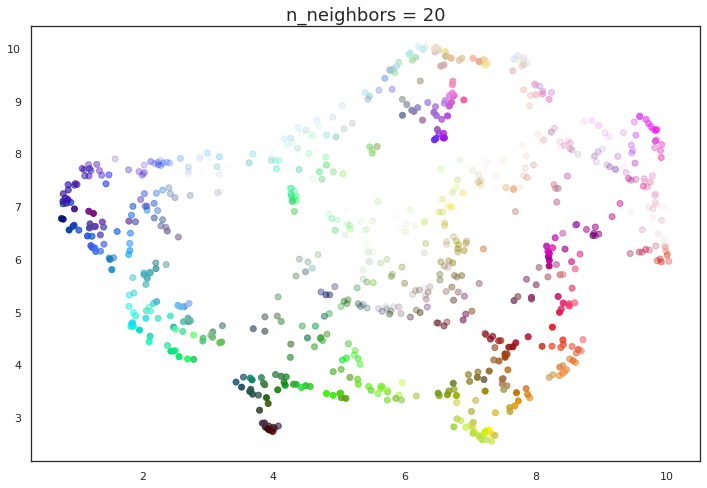

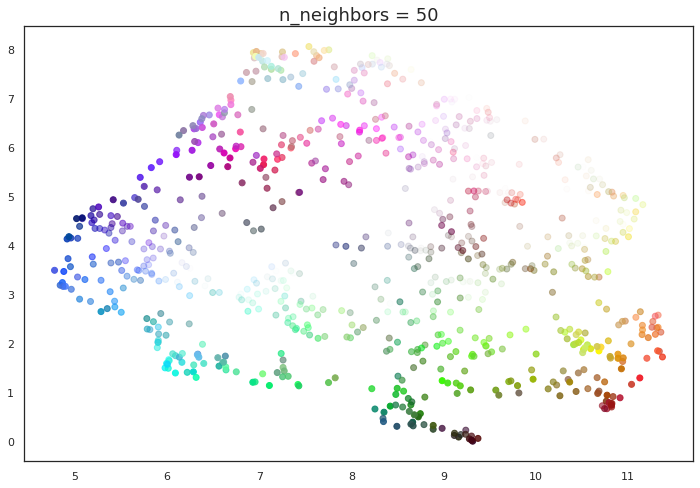

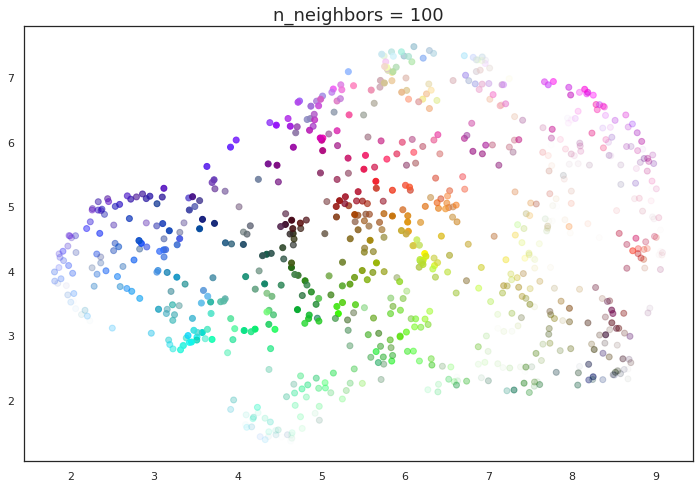

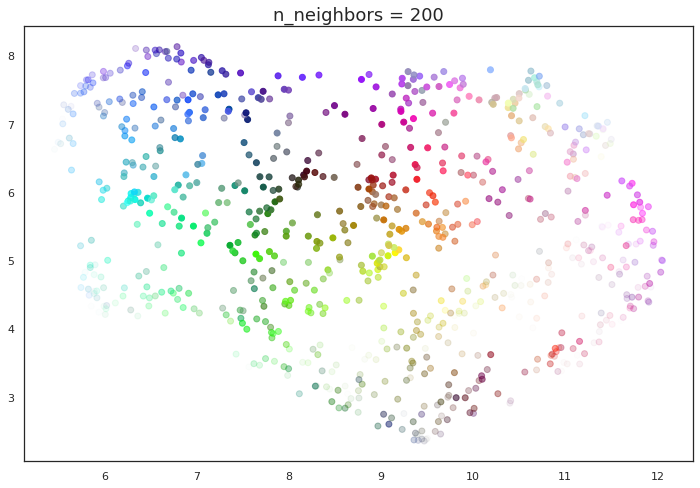

In [6]:
for n in (2, 5, 10, 20, 50, 100, 200):
    draw_umap(n_neighbors=n, title='n_neighbors = {}'.format(n))